In [10]:
# First we'll import the os module
# This will allow us to create file paths across operating systems
import os
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
from config import gkey
from techline import techline, histo, attack_type, cntry_year
from Kyle1 import terrorism_frequency, terrorism_fatalities, heat_map, group_data
from g_terror import MajorEvents, FatalitiesbyAttack

gmaps.configure(api_key=gkey)

# File to Load
file_to_load = "Resources/globalterrorism.csv"

# Read Purchasing File and store into Pandas data frame
terror_data = pd.read_csv(file_to_load, encoding = "ISO-8859-1", low_memory=False)
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


C:\Users\VWATSON\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\VWATSON\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\VWATSON\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


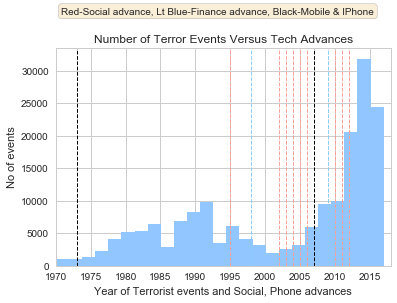

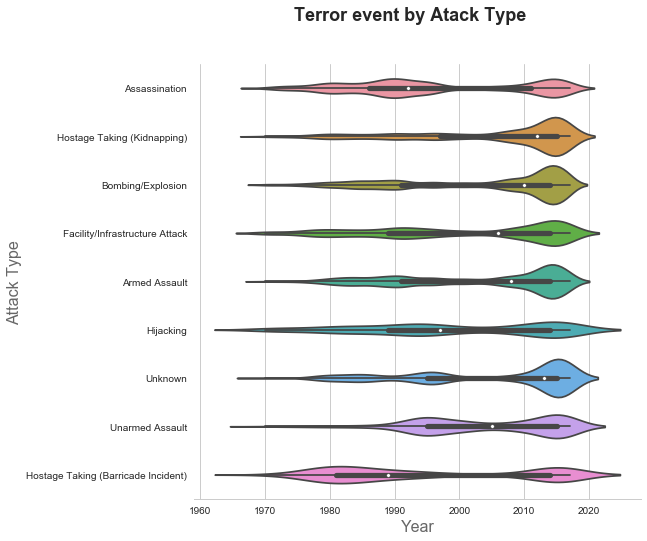

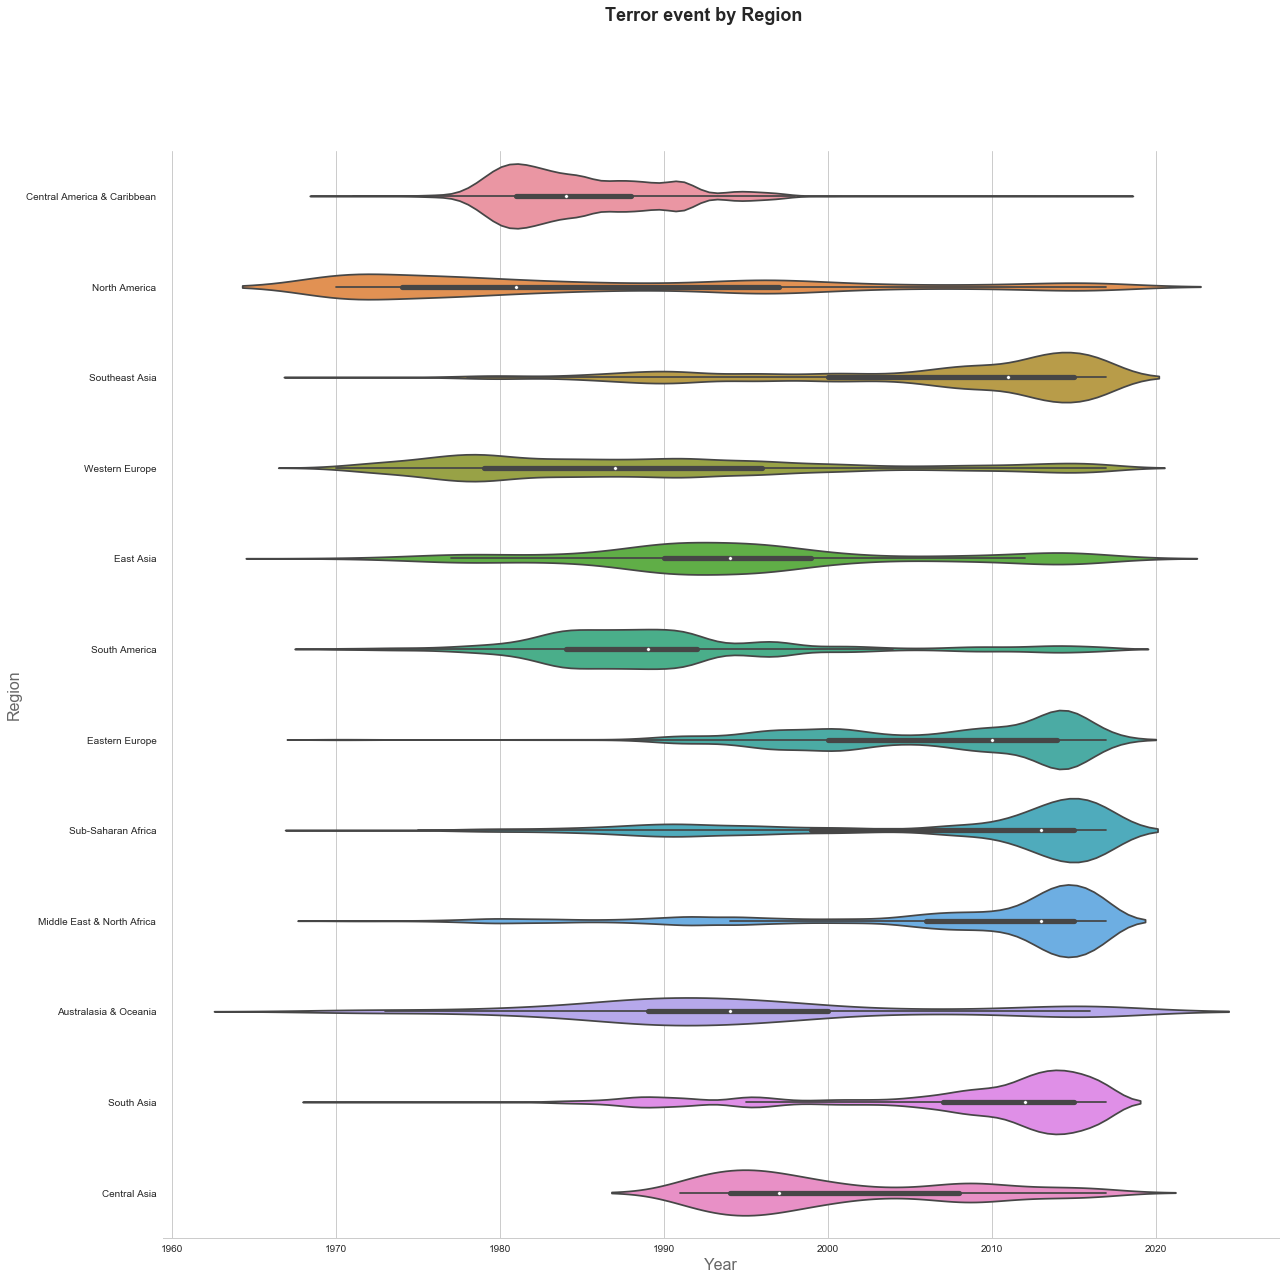

In [11]:
tech_data=techline()

f=histo(terror_data, tech_data)
f.show()
plt.savefig("tech_histo.png")

f=attack_type(terror_data)
f.show()
plt.savefig("attack_type.png")

f=cntry_year(terror_data)
f.show()
plt.savefig("country_year.png")



C:\Users\VWATSON\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\VWATSON\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


region_txt
Australasia & Oceania           44
Central America & Caribbean    217
Central Asia                    50
East Asia                       82
Eastern Europe                 157
Name: gname, dtype: int64

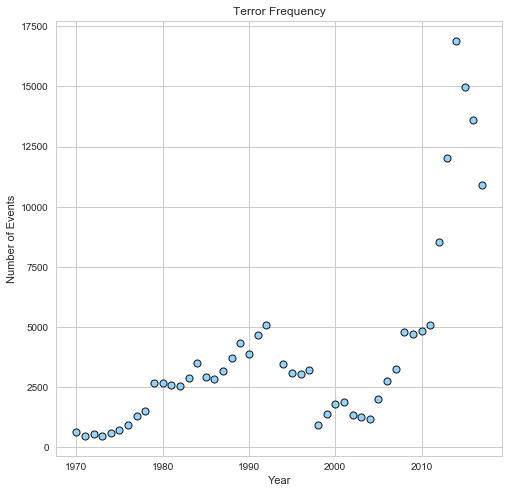

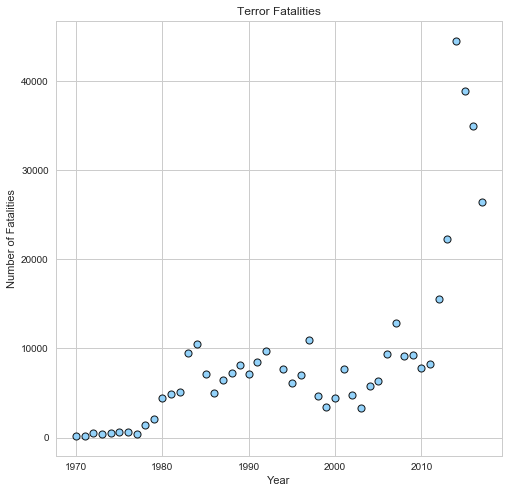

In [12]:
f=terrorism_frequency(terror_data)
f.show()
plt.savefig("TerrorismFrequency.png")


f=terrorism_fatalities(terror_data)
f.show()
plt.savefig("TerrorismFatalities.png")

g=group_data(terror_data)
g.head()

In [13]:

terror_data_drop = terror_data.dropna(axis=0, subset=["latitude", "longitude"])
    
# Store latitude and longitude in locations
locations = terror_data_drop[["latitude", "longitude"]]

# Fill NaN values and convert to float
fatalities = terror_data_drop["nkill"]
    
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=fatalities, 
                                     dissipating=False, max_intensity=10,
                                     point_radius=1)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig    


Figure(layout=FigureLayout(height='420px'))

C:\Users\VWATSON\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


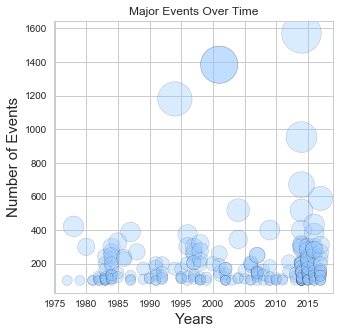

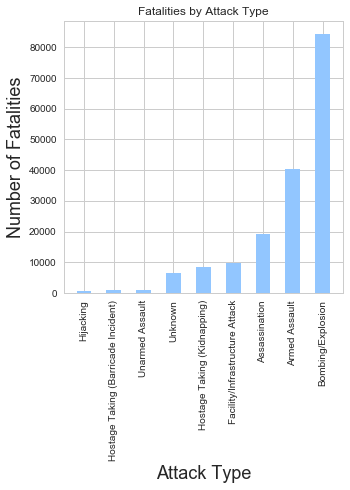

In [14]:
f=MajorEvents(terror_data)
f.show()
plt.savefig('MajorEventsOverTime.png')


f=FatalitiesbyAttack(terror_data)
f.show
plt.savefig("Fatalities by Attack Type.png")
